In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import celloracle as co
import anndata as ad
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [6, 4.5]

# DEG SETUP

In [4]:
oracle = co.load_hdf5("jinlab/ctxobj.subclass.DEG.celloracle.oracle")
links = co.load_hdf5("jinlab/links.subclasses.DEG.celloracle.links")

In [7]:
genes_in_scRNA = set(oracle.adata.var_names)
tf_genes_in_dict = set(oracle.TFdict.keys())
overlapping_genes = genes_in_scRNA.intersection(tf_genes_in_dict)

print(f"Number of overlapping genes: {len(overlapping_genes)}")


Number of overlapping genes: 2368


In [6]:
oracle.adata.to_df()

,Micall1,Usf2,1500015A07Rik,C130026L21Rik,Slc20a2,Ajap1,Pigo,Flrt1,Numb,Prtn3,...,Gpx3,Sdr42e1,Zfp526,Dock5,Samd11,Slc22a21,Htr5a,Fam53b,Lrrc56,Tbr1
Ch1_AAACCTGTCAGGTTCA-1,0.000000,0.000000,0.000000,0.000000,0.0,1.267195,0.615344,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.993469
Ch1_AAACCTGTCCTTTACA-1,0.000000,0.736179,0.000000,0.000000,0.0,1.677428,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.736179,0.00000,0.0,0.000000
Ch1_AAACGGGCACAGGAGT-1,0.000000,0.000000,0.000000,0.000000,0.0,1.132484,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
Ch1_AAACGGGCATGCAATC-1,0.490013,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.817432
Ch1_AAACGGGGTAATAGCA-1,0.000000,0.000000,0.000000,0.000000,0.0,1.792742,0.000000,0.000000,0.811585,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ch5_TTTGGTTGTTCACGGC-1,0.000000,0.000000,0.000000,0.000000,0.0,0.709781,0.000000,0.000000,0.000000,0.709781,...,0.0,0.0,0.709781,0.000000,0.000000,0.0,0.000000,0.00000,0.0,1.120730
Ch5_TTTGGTTTCGAACGGA-1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.618621,0.618621,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.618621
Ch5_TTTGGTTTCTTTACGT-1,0.549240,0.549240,0.000000,0.000000,0.0,0.549240,0.000000,0.000000,0.549240,0.000000,...,0.0,0.0,0.000000,0.000000,0.549240,0.0,0.000000,0.00000,0.0,0.000000
Ch5_TTTGTCAGTTGACGTT-1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.889580,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.88958,0.0,0.000000


In [3]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, 
                              GRN_unit="cluster",
                              use_cluster_specific_TFdict=True)

  0%|          | 0/34 [00:00<?, ?it/s]

In [120]:
varnames = oracle.adata.var_names
var_names_str = " ".join(varnames)

In [122]:
varnames = varnames[:2000]

In [123]:
var_names_str = " ".join(varnames)

In [4]:
goi = "Tbr1"

# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.46},
                      GRN_unit="cluster",
                      n_propagation=3)

In [5]:
oracle_input = oracle.adata.copy()
oracle_count = oracle.adata.copy()
oracle_input.X = oracle.adata.layers["simulation_input"].copy()
oracle_count.X = oracle.adata.layers["simulated_count"].copy()

In [6]:
# Assuming 'adata' is your AnnData object and clusters are identified
# 'cluster_key' is the key in adata.obs that contains cluster labels
# 'cluster_1' and 'cluster_2' are the cluster labels you want to compare

cluster_1_cells = oracle_count[oracle_count.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = oracle_input[oracle_input.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0)
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0)

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names
fold_change_df1 = pd.DataFrame({
    'Gene': genes,
    'Treatment_Fold_Change': fold_change,
    'Treatment_Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df1 = fold_change_df1.sort_values(by='Treatment_Fold_Change', ascending=False)

In [8]:
df = pd.read_csv('jinlab/tsv/edgeR_LRT_with_sva.Tbr1_1.Excit_L6CT_CTX.tsv', sep='\t')
df = df.sort_values(by='logFC', ascending=False)
df_sorted = df.iloc[df['logFC'].abs().argsort()]
rows_to_add = df_sorted.loc[df_sorted['Unnamed: 0'] == 'Tbr1']
DEG = df_sorted.tail(3000)
DEG = pd.concat([DEG, rows_to_add], ignore_index=True)
DEG.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)

In [11]:
ctrl_oracle = co.load_hdf5("jinlab/ctxobj.ctrl.subclass.DEG.celloracle.oracle")
ctrl_links = co.load_hdf5("jinlab/links.ctrl.subclass.DEG.celloracle.links")

In [12]:
ctrl_links.filter_links()
ctrl_oracle.get_cluster_specific_TFdict_from_Links(links_object=ctrl_links)
ctrl_oracle.fit_GRN_for_simulation(alpha=10, 
                              GRN_unit="cluster",
                              use_cluster_specific_TFdict=True)

  0%|          | 0/31 [00:00<?, ?it/s]

In [13]:
goi = "Tbr1"

# Enter perturbation conditions to simulate signal propagation after the perturbation.
ctrl_oracle.simulate_shift(perturb_condition={goi: 0.46},
                      GRN_unit="cluster",
                      n_propagation=3)

In [14]:
ctrl_input = ctrl_oracle.adata.copy()
ctrl_count = ctrl_oracle.adata.copy()
ctrl_input.X = ctrl_oracle.adata.layers["simulation_input"].copy()
ctrl_count.X = ctrl_oracle.adata.layers["simulated_count"].copy()

In [15]:
# Assuming 'adata' is your AnnData object and clusters are identified
# 'cluster_key' is the key in adata.obs that contains cluster labels
# 'cluster_1' and 'cluster_2' are the cluster labels you want to compare

cluster_1_cells = ctrl_count[ctrl_count.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = ctrl_input[ctrl_input.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0)
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0)

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names
ctrl_fold_change = pd.DataFrame({
    'Gene': genes,
    'Control_Fold_Change': fold_change,
    'Control_Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
ctrl_fold_change = ctrl_fold_change.sort_values(by='Control_Fold_Change', ascending=False)

In [16]:
result = pd.merge(fold_change_df1, DEG, on="Gene", how="inner")
result = pd.merge(result, ctrl_fold_change, on="Gene", how="inner")

#result = result[result['Gene'] != 'Tbr1']
#result = result[result['Control_Log2_Fold_Change'] != 0]


In [17]:
result

,Gene,Treatment_Fold_Change,Treatment_Log2_Fold_Change,logFC,logCPM,LR,PValue,padj,Control_Fold_Change,Control_Log2_Fold_Change
0,C1ql3,6.403140,2.678780,-12.831547,3.267026,11.219583,0.000809,0.132396,6.915710,2.789877
1,Stxbp6,2.493841,1.318370,2.087715,5.694808,3.343997,0.067451,0.473755,2.538199,1.343805
2,Rnf39,1.538432,0.621461,4.193000,3.497060,1.717083,0.190069,0.641904,1.005582,0.008031
3,Acy1,1.496591,0.581680,-4.148818,4.116775,2.046892,0.152517,0.601880,1.711207,0.775014
4,Ppfibp1,1.486052,0.571484,3.007069,5.369804,2.772462,0.095899,0.526010,1.172058,0.229044
...,...,...,...,...,...,...,...,...,...,...
2996,Tbr1,0.377572,-1.405178,-0.732774,7.539583,4.897815,0.026891,0.365995,0.354854,-1.494704
2997,Acp6,0.273680,-1.869437,-3.214811,4.261883,1.035567,0.308855,0.733798,1.000000,0.000000
2998,Lin28b,0.248689,-2.007588,-3.535018,3.927931,1.245141,0.264483,0.706538,0.220669,-2.180047
2999,Cwh43,0.220547,-2.180841,-4.512919,3.239916,0.788308,0.374612,0.781086,1.000000,0.000000


In [18]:
result = result[result['Control_Log2_Fold_Change'] != 0]
result = result[result['Treatment_Log2_Fold_Change'] != 0]


In [73]:
result["FC"] = result["logFC"] ** 2

In [74]:
result

,Gene,Treatment_Fold_Change,Treatment_Log2_Fold_Change,logFC,logCPM,LR,PValue,padj,Control_Fold_Change,Control_Log2_Fold_Change,FC
0,C1ql3,6.403140,2.678780,-12.831547,3.267026,11.219583,0.000809,0.132396,6.915710,2.789877,164.648596
1,Stxbp6,2.493841,1.318370,2.087715,5.694808,3.343997,0.067451,0.473755,2.538199,1.343805,4.358555
2,Rnf39,1.538432,0.621461,4.193000,3.497060,1.717083,0.190069,0.641904,1.005582,0.008031,17.581253
3,Acy1,1.496591,0.581680,-4.148818,4.116775,2.046892,0.152517,0.601880,1.711207,0.775014,17.212691
4,Ppfibp1,1.486052,0.571484,3.007069,5.369804,2.772462,0.095899,0.526010,1.172058,0.229044,9.042464
...,...,...,...,...,...,...,...,...,...,...,...
2993,Fstl5,0.538444,-0.893131,-3.179960,5.486231,4.501466,0.033866,0.394528,0.725891,-0.462175,10.112143
2994,Rab26,0.496520,-1.010076,-3.143196,4.537746,0.972873,0.323965,0.744795,0.993501,-0.009406,9.879681
2996,Tbr1,0.377572,-1.405178,-0.732774,7.539583,4.897815,0.026891,0.365995,0.354854,-1.494704,0.536958
2998,Lin28b,0.248689,-2.007588,-3.535018,3.927931,1.245141,0.264483,0.706538,0.220669,-2.180047,12.496353


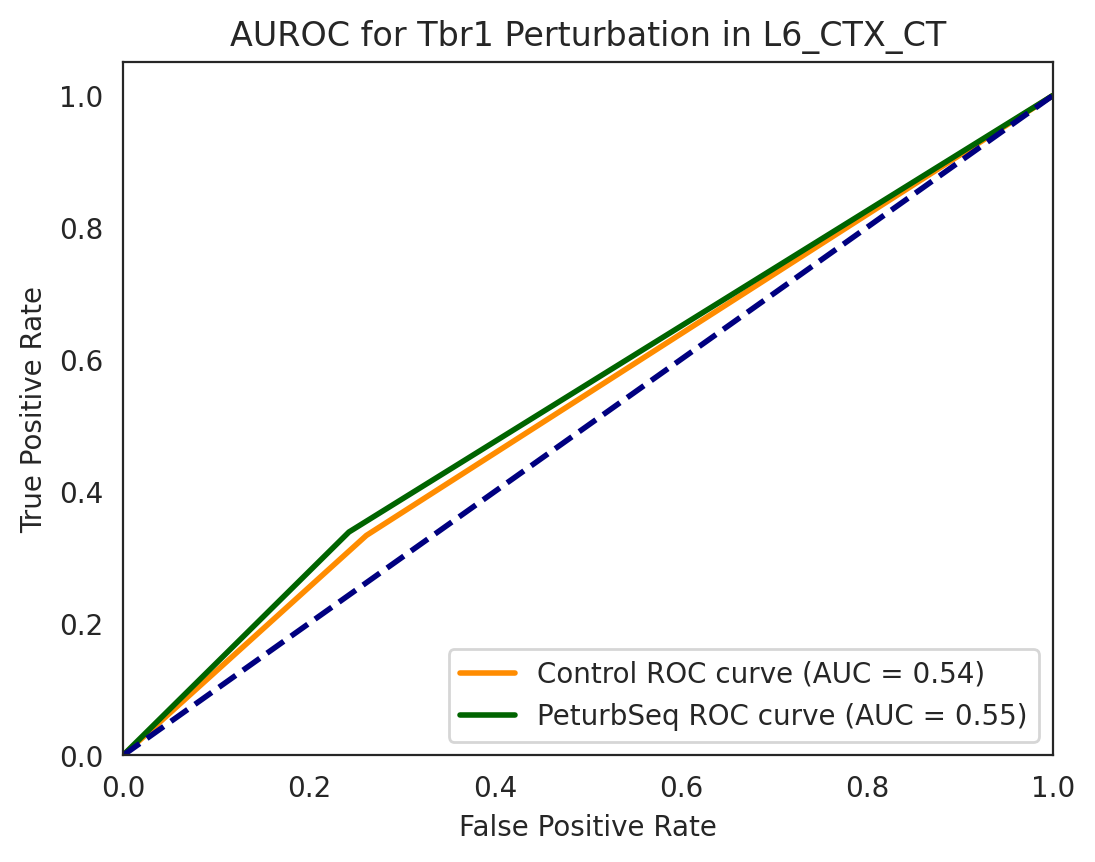

In [54]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example arrays (logFC for in silico and functional perturbations)
# Positive logFC classified as 1, negative as 0
ctrl_fc = [fc for fc in result['Control_Log2_Fold_Change']]  # LogFC from in silico perturbations
perturb_fc = result['Treatment_Log2_Fold_Change']
functional_fc = result['logFC']  # LogFC from functional perturbations

# Convert logFC to binary classifications (1 = positive, 0 = negative)

ctrl_class = [1 if fc > 0 else 0 for fc in ctrl_fc]
perturb_class = [1 if fc > 0 else 0 for fc in perturb_fc]
functional_class = [1 if fc > 0 else 0 for fc in functional_fc]

# Create confusion matrix
ctrl_tn, ctrl_fp, ctrl_fn, ctrl_tp = confusion_matrix(functional_class, ctrl_class).ravel()
perturb_tn, perturb_fp, perturb_fn, perturb_tp = confusion_matrix(functional_class, perturb_class).ravel()

# Calculate the ROC curve
ctrl_fpr, ctrl_tpr, ctrl_thresholds = roc_curve(ctrl_class, functional_class)
perturb_fpr, perturb_tpr, perturb_thresholds = roc_curve(perturb_class, functional_class)


# Calculate the AUC
ctrl_roc_auc = auc(ctrl_fpr, ctrl_tpr)
perturb_roc_auc = auc(perturb_fpr, perturb_tpr)

#print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
plt.plot(ctrl_fpr, ctrl_tpr, color='darkorange', lw=2, label=f'Control ROC curve (AUC = {ctrl_roc_auc:.2f})')
plt.plot(perturb_fpr, perturb_tpr, color='darkgreen', lw=2, label=f'PeturbSeq ROC curve (AUC = {perturb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Tbr1 Perturbation in L6_CTX_CT')
plt.legend(loc="lower right")
plt.savefig("jinlab/ctrl_peturb_auroc.jpg")

In [85]:
def scale_in_silico_fc(functional_fc, in_silico_fc):
    in_silico_class = []
    for i in range(len(functional_fc)):
        # Initialize prediction score
        initial_prediction = 0.5
        
        # Determine scaling based on functional fold change
        if functional_fc[i] > 1:  # Positive fold change
            scaled_prediction = initial_prediction + ((in_silico_fc[i]-1)/(functional_fc[i]-1)) * 0.5  # Scale positively
        elif functional_fc[i] < 1:  # Positive fold change
            scaled_prediction = initial_prediction - ((in_silico_fc[i]+1)/(functional_fc[i]+1)) * 0.5  # Scale positively
        else:
            scaled_prediction = initial_prediction
            
        # Clip predictions to stay within [0, 1]
        scaled_prediction = max(0, min(1, scaled_prediction))
        in_silico_class.append(scaled_prediction)
    return in_silico_class

# Example usage
functional_fc = [2]  # 2-fold increase in functional assay
in_silico_fc = [0.0001] # 1-fold increase in in silico model

in_silico_class = scale_in_silico_fc(functional_fc, in_silico_fc)

print(in_silico_class)

[4.999999999999449e-05]


In [58]:
test = [0 for i in range(0,100)]
test_prediction = [0.5 for i in range(0,100)]
ctrl_fpr

array([0., 1.])

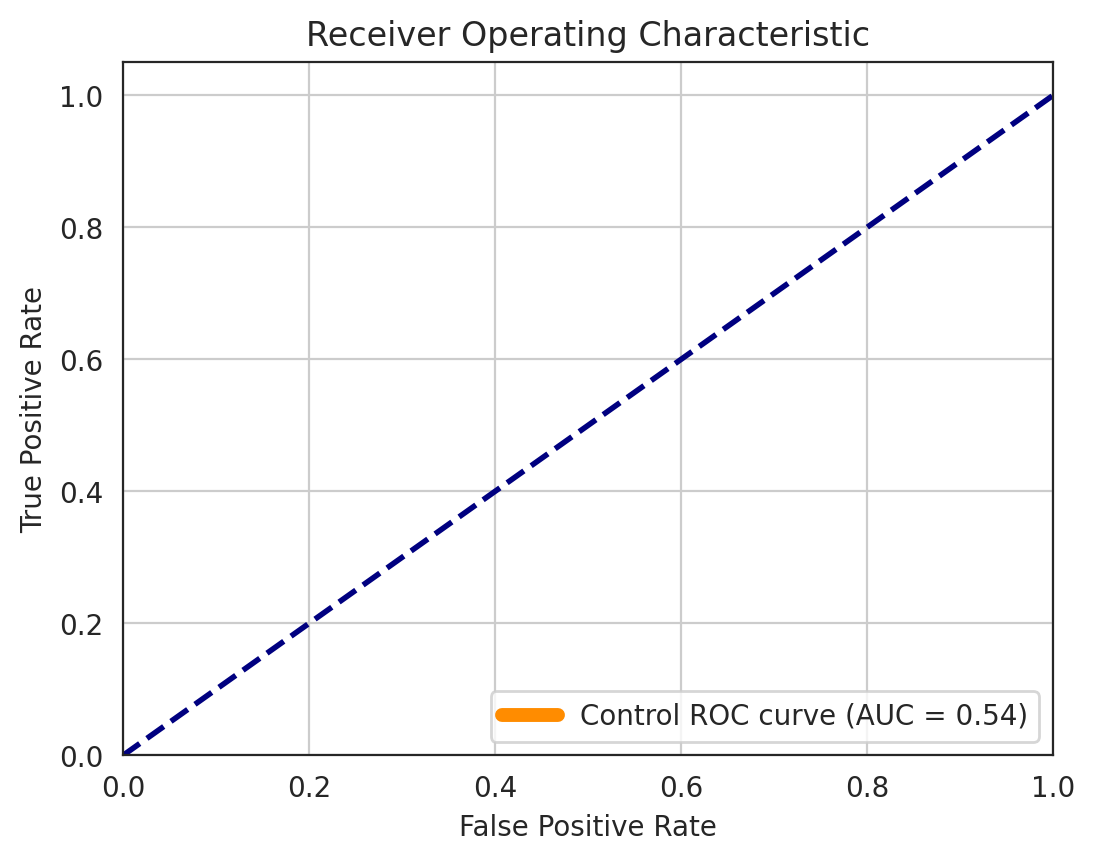

In [57]:
ctrl_fpr, ctrl_tpr, ctrl_thresholds = roc_curve(test, test_prediction)
# Plot the ROC curve
plt.figure()
plt.plot(ctrl_fpr, ctrl_tpr, color='darkorange', lw=5, label=f'Control ROC curve (AUC = {ctrl_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

(-0.05, 1.05, -0.05, 1.05)

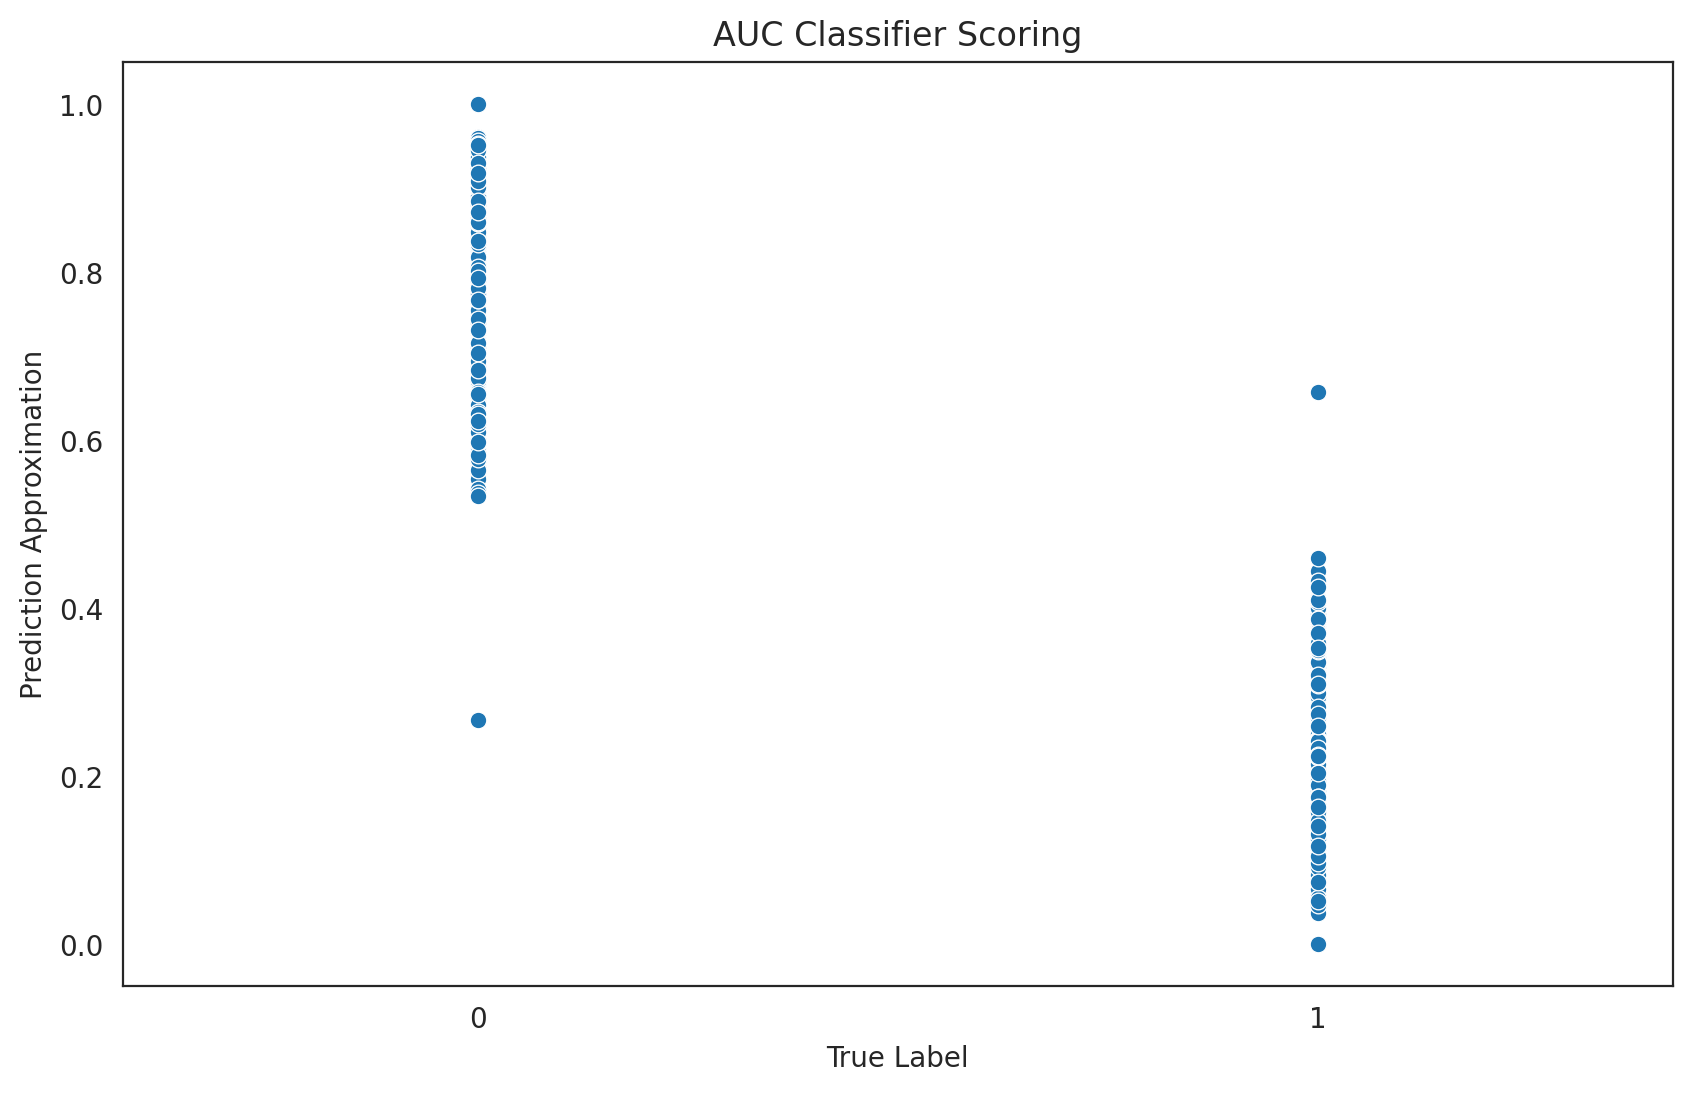

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=ctrl_class, x=functional_class)

"""
for i in range(1, len(result)):
    x_val = result['Control_Log2_Fold_Change'][i]
    y_val = result['logFC'][i]
    if abs(x_val) > 1 or abs(y_val) > 1:
        plt.text(
            x_val, 
            y_val, 
            result['Gene'][i],
            fontsize=9,
            ha='right'  # horizontal alignment
        )
"""

# Add labels and title
plt.xlim(0, 1)
plt.xticks([0, 1])
plt.ylabel('Prediction Approximation')
plt.xlabel('True Label')
plt.yticks()
plt.title('AUC Classifier Scoring')
plt.axis('equal')



In [82]:
ctrl_fpr

array([0., 0., 0., 1.])

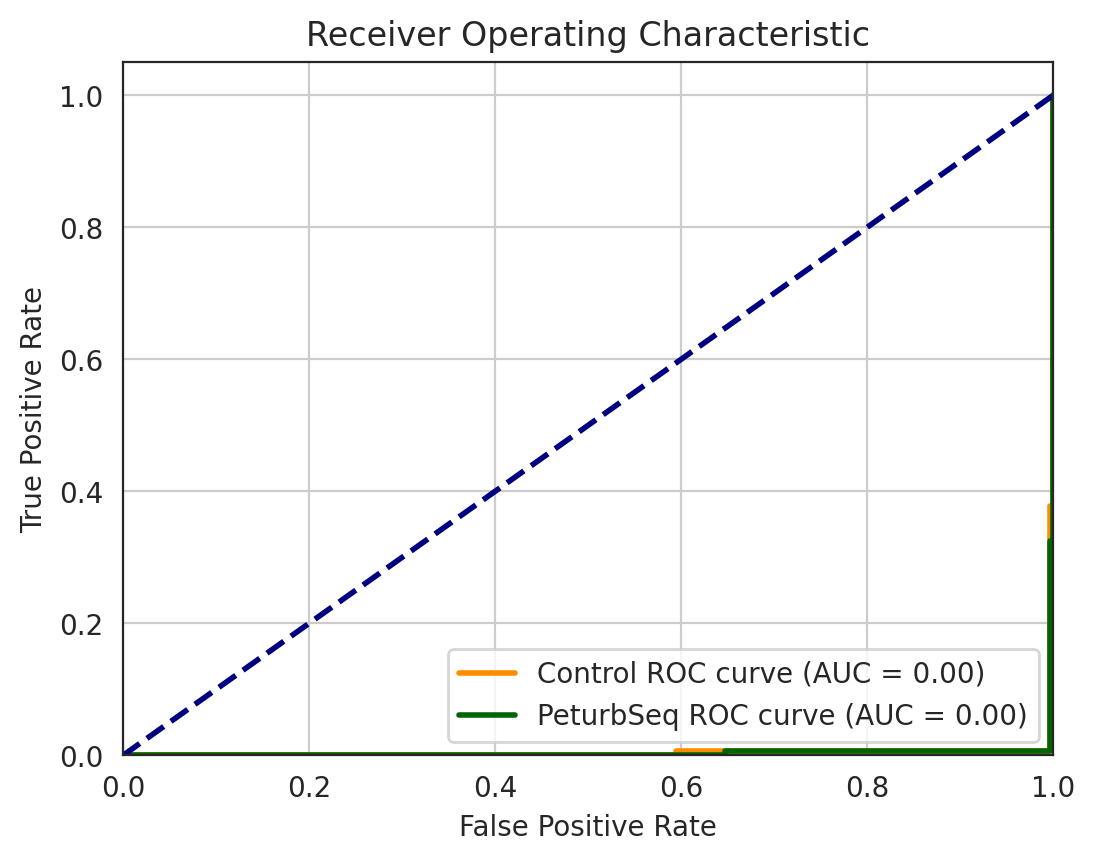

'\n# Create confusion matrix\nctrl_tn, ctrl_fp, ctrl_fn, ctrl_tp = confusion_matrix(functional_class, ctrl_class).ravel()\nperturb_tn, perturb_fp, perturb_fn, perturb_tp = confusion_matrix(functional_class, perturb_class).ravel()\n\n# Calculate the ROC curve\nctrl_fpr, ctrl_tpr, ctrl_thresholds = roc_curve(ctrl_class, functional_class)\nperturb_fpr, perturb_tpr, perturb_thresholds = roc_curve(perturb_class, functional_class)\n\n\n# Calculate the AUC\nctrl_roc_auc = auc(ctrl_fpr, ctrl_tpr)\nperturb_roc_auc = auc(perturb_fpr, perturb_tpr)\n\n#print(f"AUC: {roc_auc}")\n\n# Plot the ROC curve\nplt.figure()\nplt.plot(ctrl_fpr, ctrl_tpr, color=\'darkorange\', lw=2, label=f\'Control ROC curve (AUC = {ctrl_roc_auc:.2f})\')\nplt.plot(perturb_fpr, perturb_tpr, color=\'darkgreen\', lw=2, label=f\'PeturbSeq ROC curve (AUC = {perturb_roc_auc:.2f})\')\n\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')  # Reference line for random guessing\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])

In [116]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example arrays (logFC for in silico and functional perturbations)
# Positive logFC classified as 1, negative as 0
ctrl_fc = [fc for fc in result['Control_Log2_Fold_Change']]  # LogFC from in silico perturbations
perturb_fc = [fc for fc in result['Treatment_Log2_Fold_Change']]
functional_fc = [fc for fc in result['logFC']]  # LogFC from functional perturbations

# Convert logFC to binary classifications (1 = positive, 0 = negative)

ctrl_class = scale_in_silico_fc(functional_fc, ctrl_fc)
perturb_class = scale_in_silico_fc(functional_fc, perturb_fc)
functional_class = [1 if fc > 1 else 0 for fc in functional_fc]

ctrl_fpr, ctrl_tpr, ctrl_thresholds = roc_curve(functional_class, ctrl_class)
perturb_fpr, perturb_tpr, perturb_thresholds = roc_curve(functional_class, perturb_class)

# Calculate the AUC
ctrl_roc_auc = auc(ctrl_fpr, ctrl_tpr)
perturb_roc_auc = auc(perturb_fpr, perturb_tpr)

#print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
plt.plot(ctrl_fpr, ctrl_tpr, color='darkorange', lw=2, label=f'Control ROC curve (AUC = {ctrl_roc_auc:.2f})')
plt.plot(perturb_fpr, perturb_tpr, color='darkgreen', lw=2, label=f'PeturbSeq ROC curve (AUC = {perturb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

"""
# Create confusion matrix
ctrl_tn, ctrl_fp, ctrl_fn, ctrl_tp = confusion_matrix(functional_class, ctrl_class).ravel()
perturb_tn, perturb_fp, perturb_fn, perturb_tp = confusion_matrix(functional_class, perturb_class).ravel()

# Calculate the ROC curve
ctrl_fpr, ctrl_tpr, ctrl_thresholds = roc_curve(ctrl_class, functional_class)
perturb_fpr, perturb_tpr, perturb_thresholds = roc_curve(perturb_class, functional_class)


# Calculate the AUC
ctrl_roc_auc = auc(ctrl_fpr, ctrl_tpr)
perturb_roc_auc = auc(perturb_fpr, perturb_tpr)

#print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
plt.plot(ctrl_fpr, ctrl_tpr, color='darkorange', lw=2, label=f'Control ROC curve (AUC = {ctrl_roc_auc:.2f})')
plt.plot(perturb_fpr, perturb_tpr, color='darkgreen', lw=2, label=f'PeturbSeq ROC curve (AUC = {perturb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("jinlab/ctrl_peturb_auroc.jpg")
"""

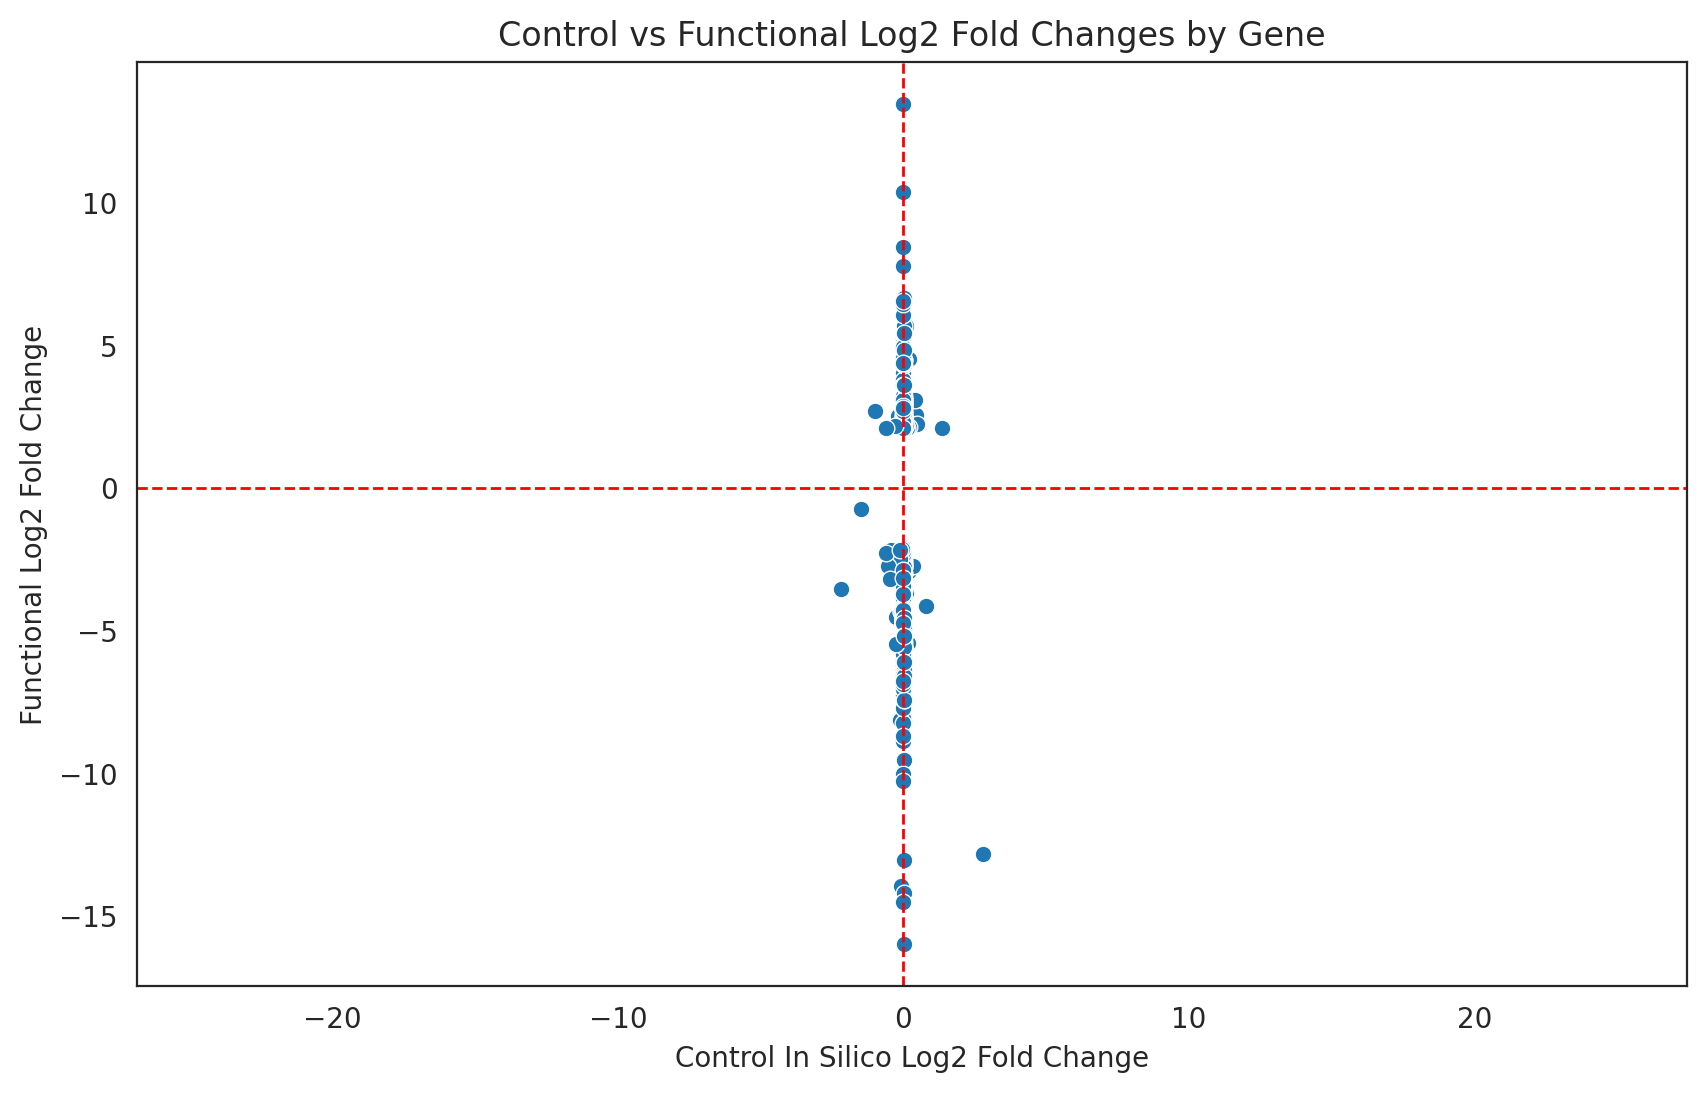

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='Control_Log2_Fold_Change', y='logFC')

"""
for i in range(1, len(result)):
    x_val = result['Control_Log2_Fold_Change'][i]
    y_val = result['logFC'][i]
    if abs(x_val) > 1 or abs(y_val) > 1:
        plt.text(
            x_val, 
            y_val, 
            result['Gene'][i],
            fontsize=9,
            ha='right'  # horizontal alignment
        )
"""

# Add labels and title
plt.xlabel('Control In Silico Log2 Fold Change')
plt.ylabel('Functional Log2 Fold Change')
plt.xticks()
plt.yticks()
plt.title('Control vs Functional Log2 Fold Changes by Gene')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axis('equal')


# Display the plot
plt.savefig("jinlab/DEG_ctrl_fnc_scatter.jpg")

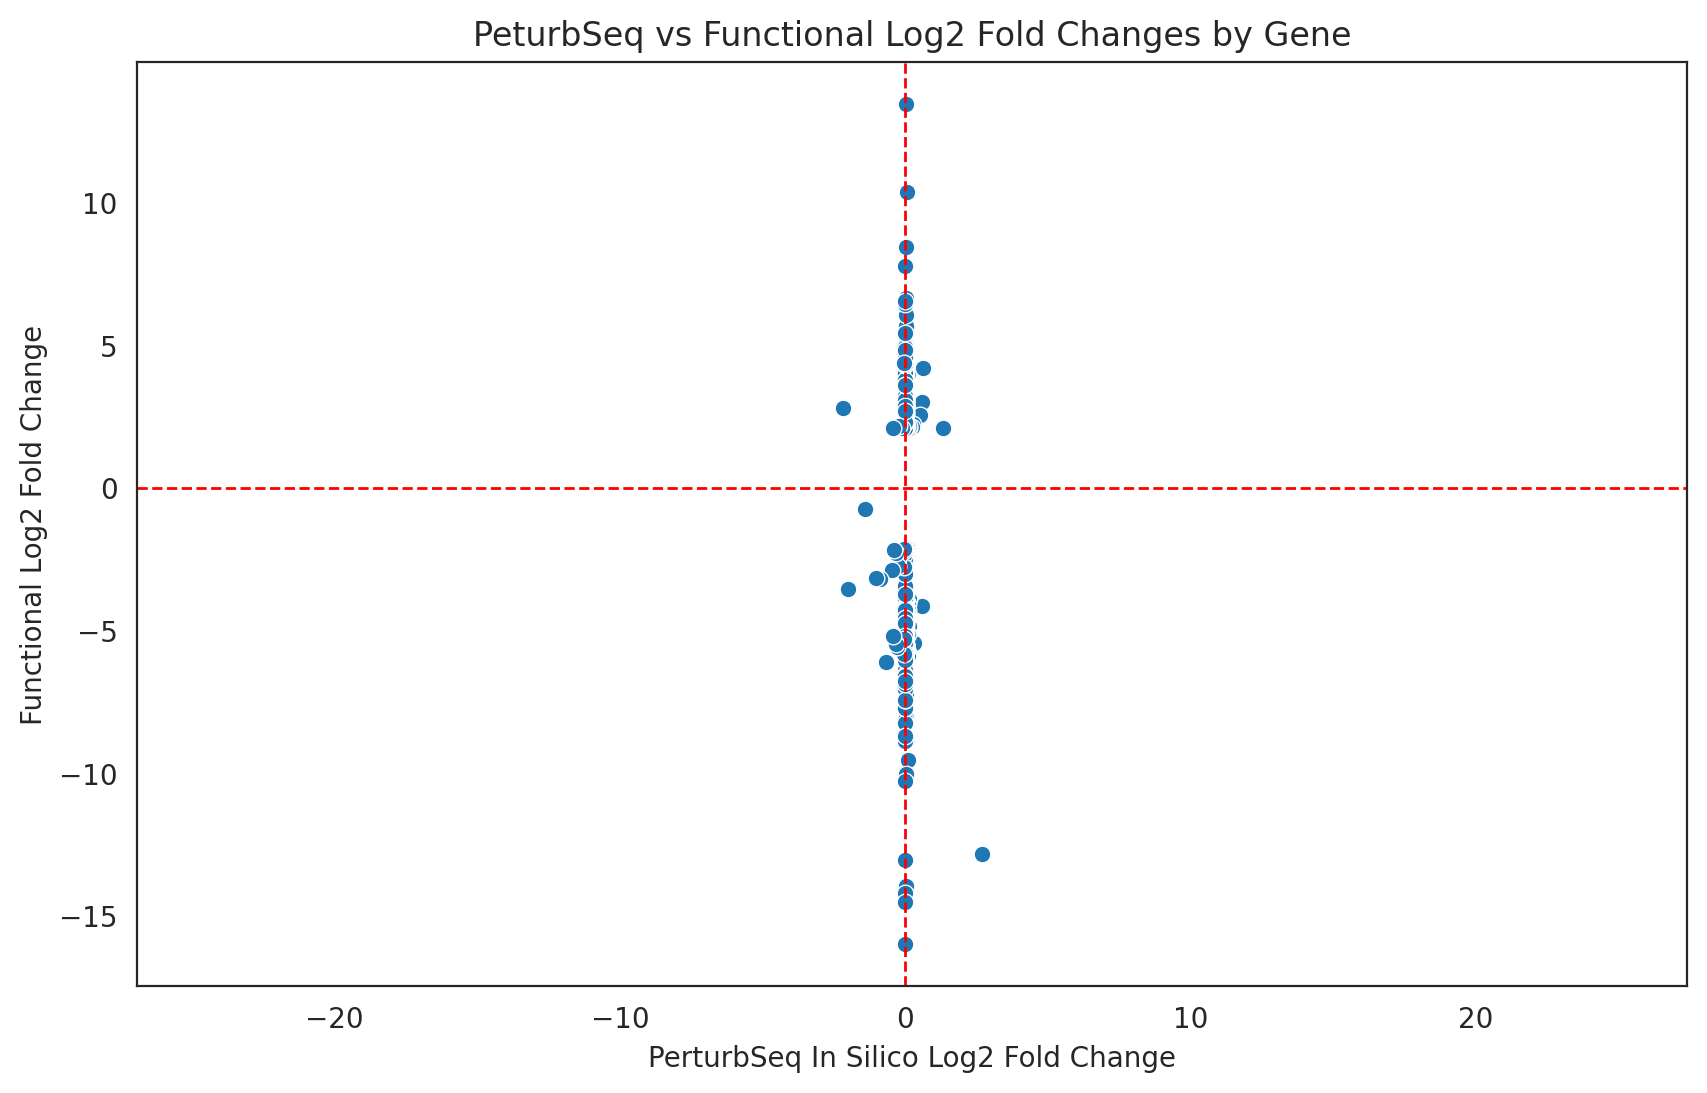

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='Treatment_Log2_Fold_Change', y='logFC')

"""
for i in range(1, len(result)):
    x_val = result['Control_Log2_Fold_Change'][i]
    y_val = result['logFC'][i]
    if abs(x_val) > 1 or abs(y_val) > 1:
        plt.text(
            x_val, 
            y_val, 
            result['Gene'][i],
            fontsize=9,
            ha='right'  # horizontal alignment
        )
"""

# Add labels and title
plt.xlabel('PerturbSeq In Silico Log2 Fold Change')
plt.ylabel('Functional Log2 Fold Change')
plt.xticks()
plt.yticks()
plt.title('PeturbSeq vs Functional Log2 Fold Changes by Gene')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axis('equal')


# Display the plot
plt.savefig("jinlab/DEG_perturb_fnc_scatter.jpg")

# SONGPENG DATA

In [3]:
adata = sc.read_h5ad("jinlab/songpeng/sa2.allen.subclass.L6_CT_CTX_Glut.ann.hdf5")

In [4]:
tfi_all = co.motif_analysis.load_TFinfo("jinlab/songpeng/sa2subclass.L6_CT_CTX_Glut.pdc.celloracle.tfinfo")

In [5]:
tfi_all

In [6]:
TFdict = tfi_all.to_dictionary()

1. Converting scanned results into one-hot encoded dataframe.


  0%|          | 0/34109 [00:00<?, ?it/s]

2. Converting results into dictionaries.


  0%|          | 0/8924 [00:00<?, ?it/s]

  0%|          | 0/1091 [00:00<?, ?it/s]

In [7]:
adata.layers["raw_count"] = adata.X.copy()
adata.layers["logCPM"] = adata.X.copy()
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver = "arpack")
sc.pp.neighbors(adata, n_neighbors = 4, n_pcs = 50)
sc.tl.umap(adata)

Creat CellOracle object.


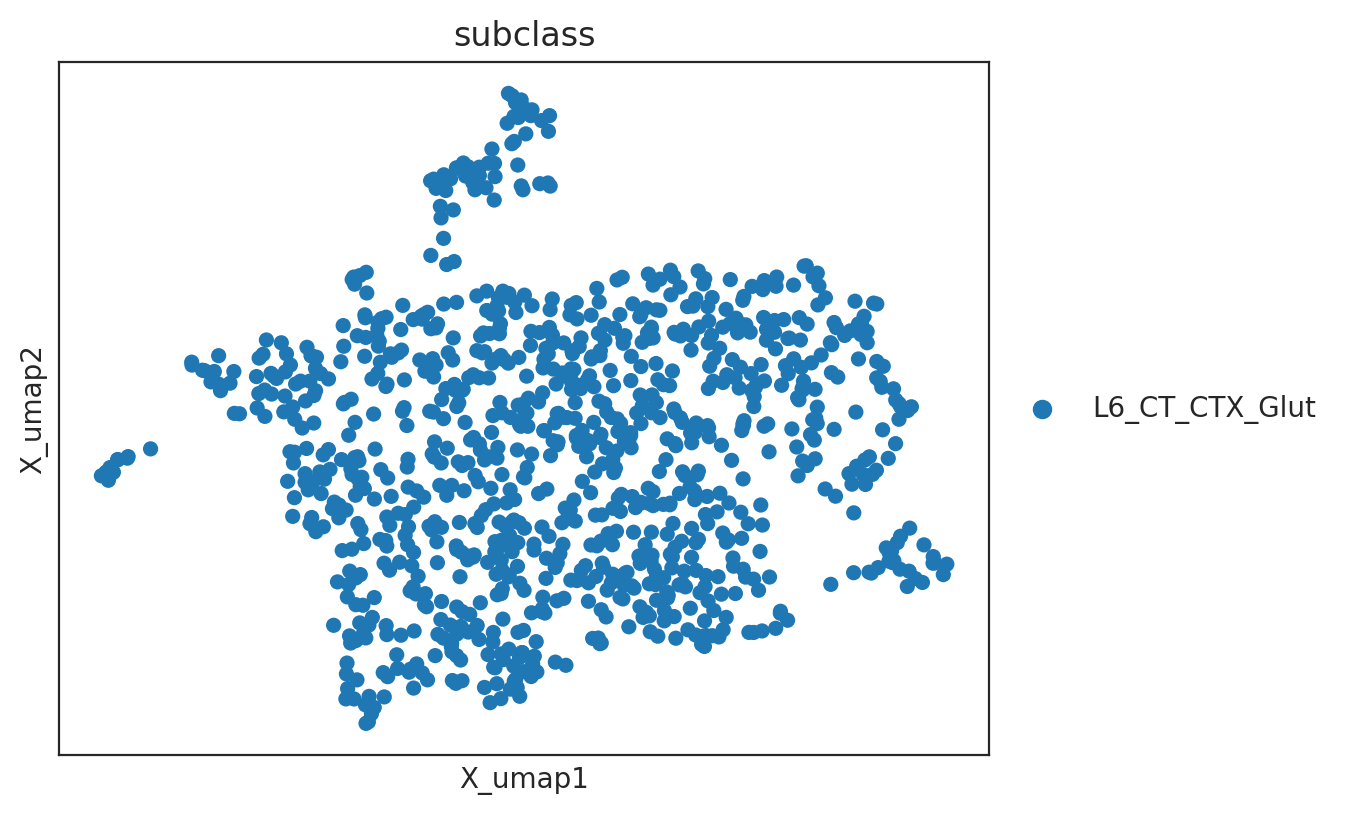

In [9]:
print("Creat CellOracle object.")
oracle = co.Oracle()
adata.X = adata.layers["logCPM"].copy()
oracle.import_anndata_as_normalized_count(adata = adata,
                                          cluster_column_name = "subclass",
                                          embedding_name = 'X_umap')

In [10]:
oracle.import_TF_data(TFdict = TFdict)

In [11]:
oracle.perform_PCA()

In [12]:
n_comps = np.where(np.diff(np.diff(
    np.cumsum(oracle.pca.explained_variance_ratio_)) > 0.002))[0][0]
# plt.axvline(n_comps, c="k")
# plt.show()
n_comps = min(n_comps, 50)
n_cell = oracle.adata.shape[0]
k = max(int(0.025 * n_cell), 4)

In [13]:
print("KNN imputation.")
oracle.knn_imputation(n_pca_dims = n_comps, k = k, balanced = True,
                      b_sight = k * 8, b_maxl = k*4, n_jobs=4)

KNN imputation.


In [14]:
%%time
# get GRN
links = oracle.get_links(cluster_name_for_GRN_unit = "subclass",
                         alpha = 10, verbose_level=10)

  0%|          | 0/1 [00:00<?, ?it/s]

Inferring GRN for L6_CT_CTX_Glut...


  0%|          | 0/1080 [00:00<?, ?it/s]

CPU times: user 10min 8s, sys: 5.31 s, total: 10min 13s
Wall time: 11min 33s


In [15]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, 
                              GRN_unit="cluster",
                              use_cluster_specific_TFdict=True)

  0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
oracle = co.load_hdf5("jinlab/songpeng_grn/songpeng.L6_CT_CTX_Glut.calculated.subclass.celloracle.oracle")

In [92]:
goi = "Tbr1"

# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.46},
                      GRN_unit="cluster",
                      n_propagation=3)

In [93]:
oracle_input = oracle.adata.copy()
oracle_count = oracle.adata.copy()
oracle_input.X = oracle.adata.layers["simulation_input"].copy()
oracle_count.X = oracle.adata.layers["simulated_count"].copy()

In [94]:
# Assuming 'adata' is your AnnData object and clusters are identified
# 'cluster_key' is the key in adata.obs that contains cluster labels
# 'cluster_1' and 'cluster_2' are the cluster labels you want to compare

cluster_1_cells = oracle_count
cluster_2_cells = oracle_input

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0)
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0)

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names
fold_change_df1 = pd.DataFrame({
    'Gene': genes,
    'Treatment_Fold_Change': fold_change,
    'Treatment_Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df1 = fold_change_df1.sort_values(by='Treatment_Fold_Change', ascending=False)

In [95]:
fold_change_df1

,Gene,Treatment_Fold_Change,Treatment_Log2_Fold_Change
2906,Ptchd4,2.106573,1.074898
1486,Ifitm2,2.103409,1.072729
1194,Aldh1l1,1.792554,0.842016
2742,Igfbp6,1.645303,0.718353
2825,Gm49678,1.612650,0.689433
...,...,...,...
1677,Eepd1,0.357936,-1.482226
1983,Srgap1,0.334414,-1.580294
743,Nkain3,0.200094,-2.321253
533,Hey1,0.106593,-3.229813


In [98]:
df = pd.read_csv('jinlab/tsv/edgeR_LRT_with_sva.Tbr1_1.Excit_L6CT_CTX.tsv', sep='\t')
df = df.sort_values(by='logFC', ascending=False)
df_sorted = df.iloc[df['logFC'].abs().argsort()]

In [99]:
df_sorted.rename(columns={"Unnamed: 0": "Gene"}, inplace=True)

In [100]:
df_sorted

,Gene,logFC,logCPM,LR,PValue,padj
5761,Trappc2l,0.000023,7.525851,1.313452e-08,0.999909,1.000000
2396,Ecpas,0.000147,7.092205,3.230427e-09,0.999955,1.000000
6452,Ctnnb1,0.000310,8.130853,1.437048e-06,0.999044,1.000000
8808,Vcan,0.000328,7.784818,1.521817e-06,0.999016,1.000000
7035,Naca,0.000352,8.199868,2.063721e-06,0.998854,1.000000
...,...,...,...,...,...,...
2925,Samd11,20.298857,3.012405,1.031780e+01,0.001318,0.158916
7301,Slc22a21,-21.619882,3.064217,9.119526e+00,0.002529,0.194796
3013,Htr5a,24.508745,3.308836,1.099561e+01,0.000913,0.141899
5088,Fam53b,-28.062619,3.146522,1.381987e+01,0.000201,0.077500


In [101]:
merged_df = fold_change_df1.merge(df_sorted, how='left', left_on='Gene', right_on='Gene')


In [102]:
merged_df

,Gene,Treatment_Fold_Change,Treatment_Log2_Fold_Change,logFC,logCPM,LR,PValue,padj
0,Ptchd4,2.106573,1.074898,-0.387421,5.319731,0.060679,0.805426,0.965864
1,Ifitm2,2.103409,1.072729,0.263096,5.696853,0.040155,0.841178,0.977243
2,Aldh1l1,1.792554,0.842016,NaN,NaN,NaN,NaN,NaN
3,Igfbp6,1.645303,0.718353,NaN,NaN,NaN,NaN,NaN
4,Gm49678,1.612650,0.689433,0.035435,6.097033,0.000979,0.975037,0.998244
...,...,...,...,...,...,...,...,...
3276,Eepd1,0.357936,-1.482226,-5.882671,4.392392,3.472839,0.062384,0.466691
3277,Srgap1,0.334414,-1.580294,-0.455692,7.118306,0.805565,0.369435,0.778440
3278,Nkain3,0.200094,-2.321253,0.373714,6.355667,0.220592,0.638589,0.913670
3279,Hey1,0.106593,-3.229813,4.955086,4.970285,7.459004,0.006312,0.257241


In [103]:
merged_df.dropna()

,Gene,Treatment_Fold_Change,Treatment_Log2_Fold_Change,logFC,logCPM,LR,PValue,padj
0,Ptchd4,2.106573,1.074898,-0.387421,5.319731,0.060679,0.805426,0.965864
1,Ifitm2,2.103409,1.072729,0.263096,5.696853,0.040155,0.841178,0.977243
4,Gm49678,1.612650,0.689433,0.035435,6.097033,0.000979,0.975037,0.998244
5,Cntn6,1.407233,0.492862,0.185639,6.466119,0.065352,0.798229,0.963827
6,Luzp1,1.343697,0.426208,0.278666,6.219040,0.083499,0.772610,0.957675
...,...,...,...,...,...,...,...,...
3276,Eepd1,0.357936,-1.482226,-5.882671,4.392392,3.472839,0.062384,0.466691
3277,Srgap1,0.334414,-1.580294,-0.455692,7.118306,0.805565,0.369435,0.778440
3278,Nkain3,0.200094,-2.321253,0.373714,6.355667,0.220592,0.638589,0.913670
3279,Hey1,0.106593,-3.229813,4.955086,4.970285,7.459004,0.006312,0.257241


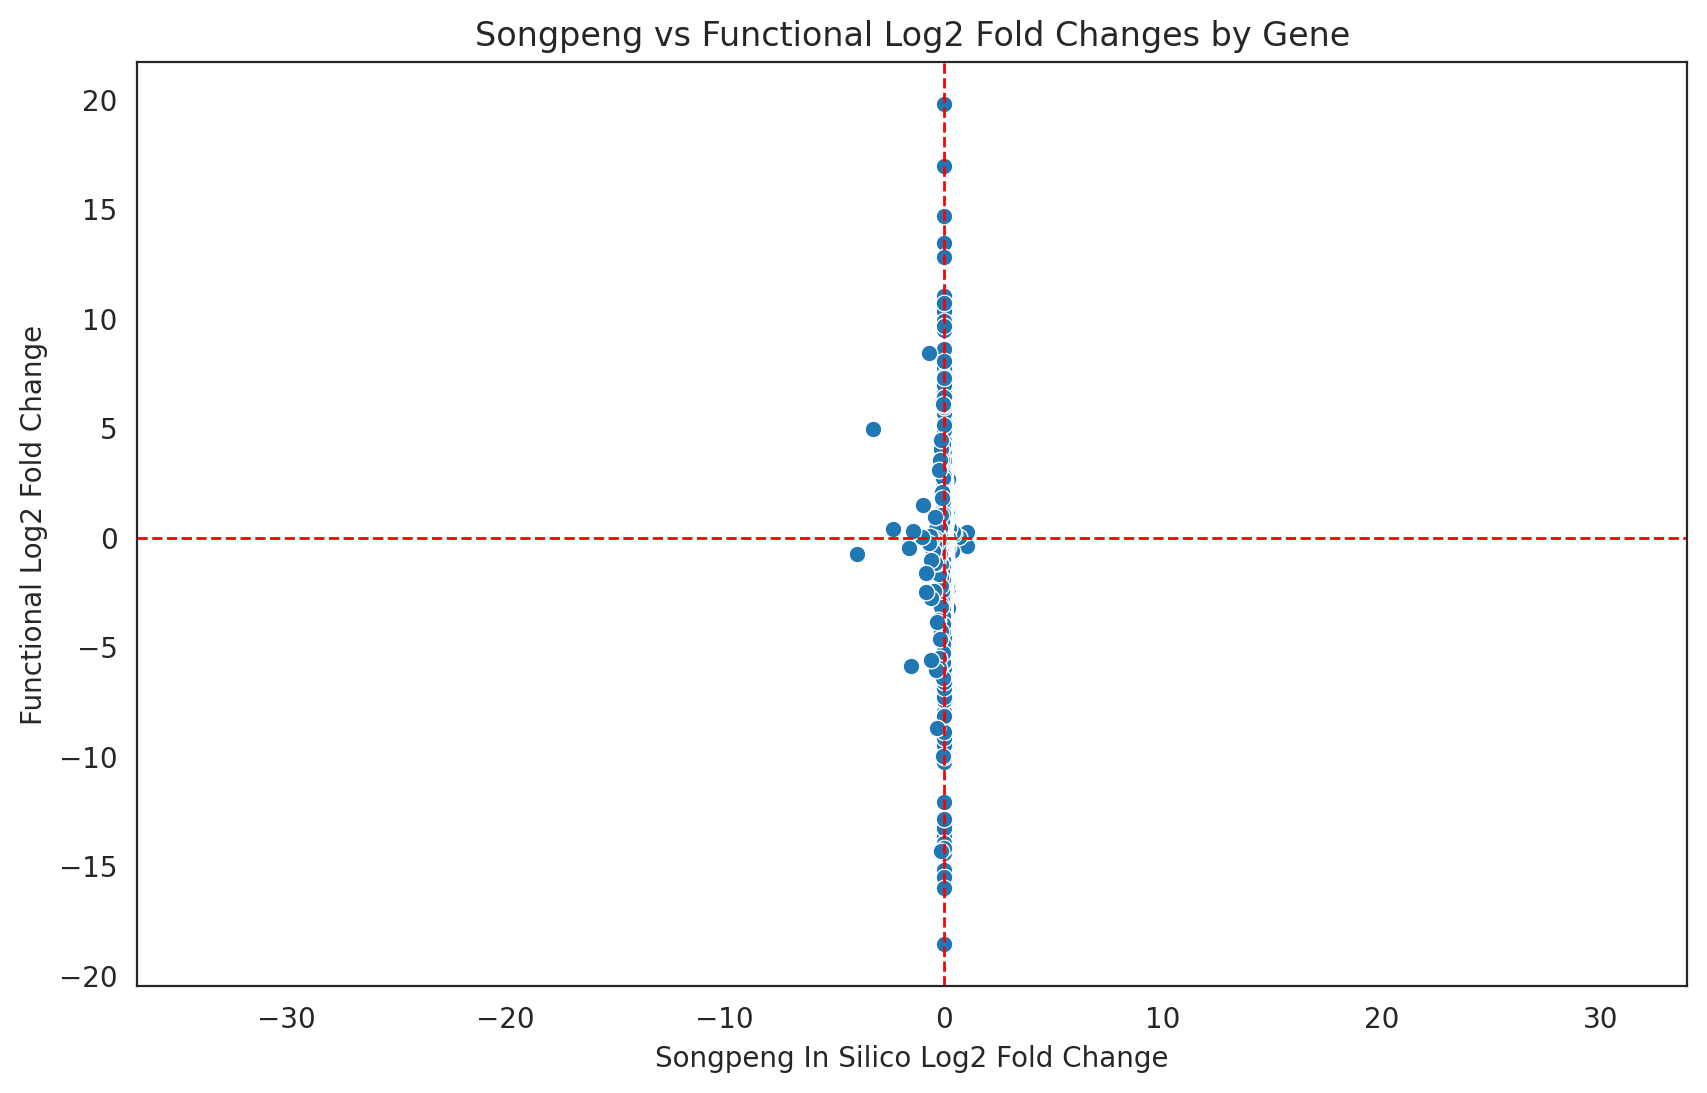

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Treatment_Log2_Fold_Change', y='logFC')

"""
for i in range(1, len(result)):
    x_val = result['Control_Log2_Fold_Change'][i]
    y_val = result['logFC'][i]
    if abs(x_val) > 1 or abs(y_val) > 1:
        plt.text(
            x_val, 
            y_val, 
            result['Gene'][i],
            fontsize=9,
            ha='right'  # horizontal alignment
        )
"""

# Add labels and title
plt.xlabel('Songpeng In Silico Log2 Fold Change')
plt.ylabel('Functional Log2 Fold Change')
plt.xticks()
plt.yticks()
plt.title('Songpeng vs Functional Log2 Fold Changes by Gene')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axis('equal')


# Display the plot
plt.savefig("jinlab/songpeng_perturb_fnc_scatter.jpg")

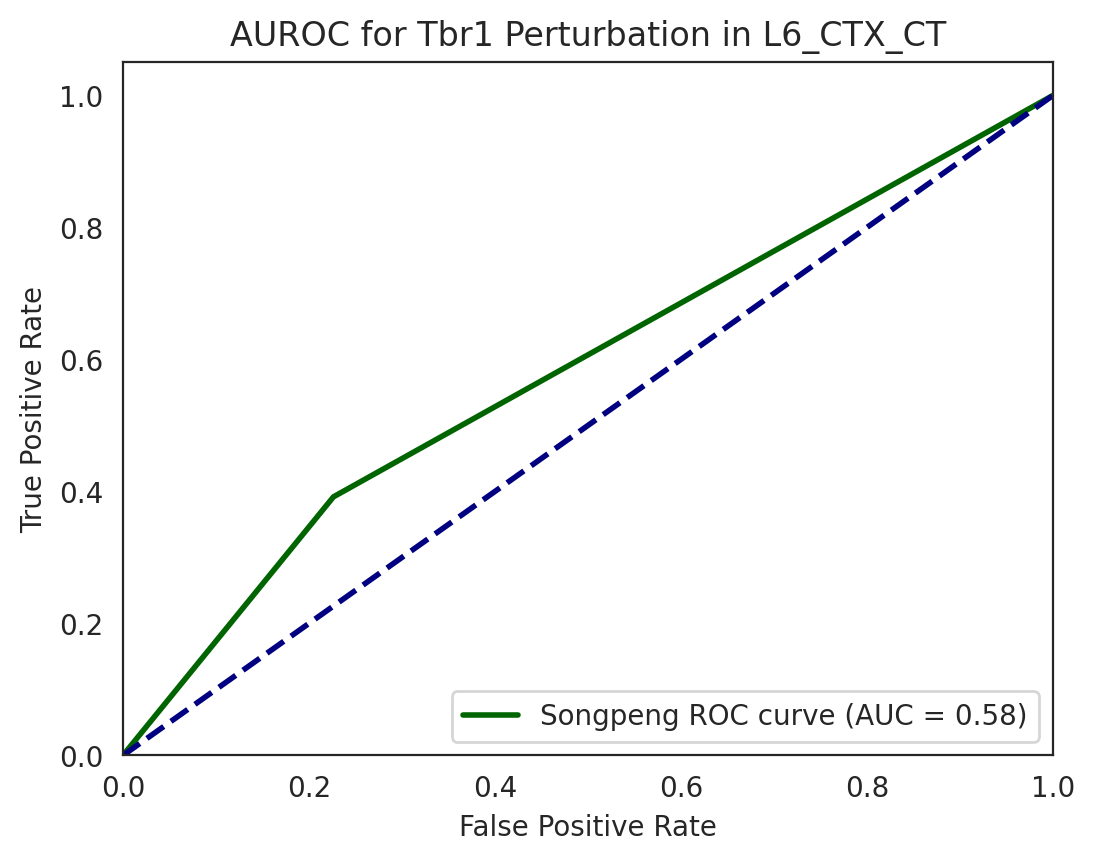

In [105]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, roc_auc_score

# Example arrays (logFC for in silico and functional perturbations)
# Positive logFC classified as 1, negative as 0
#ctrl_fc = result['Control_Log2_Fold_Change']  # LogFC from in silico perturbations
perturb_fc = merged_df['Treatment_Log2_Fold_Change']
functional_fc = merged_df['logFC']  # LogFC from functional perturbations

#ctrl_class = [1 if fc > 0 else 0 for fc in ctrl_fc]
perturb_class = [1 if fc > 0 else 0 for fc in perturb_fc]
functional_class = [1 if fc > 0 else 0 for fc in functional_fc]

# Create confusion matrix
#ctrl_tn, ctrl_fp, ctrl_fn, ctrl_tp = confusion_matrix(functional_class, ctrl_class).ravel()
perturb_tn, perturb_fp, perturb_fn, perturb_tp = confusion_matrix(functional_class, perturb_class).ravel()
#print(f"Confusion Matrix: TP = {tp}, FP = {fp}, TN = {tn}, FN = {fn}")

# Calculate the ROC curve
#ctrl_fpr, ctrl_tpr, ctrl_thresholds = roc_curve(ctrl_class, functional_class)
perturb_fpr, perturb_tpr, perturb_thresholds = roc_curve(perturb_class, functional_class)


# Calculate the AUC
#ctrl_roc_auc = auc(ctrl_fpr, ctrl_tpr)
perturb_roc_auc = auc(perturb_fpr, perturb_tpr)

#print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
#plt.plot(ctrl_fpr, ctrl_tpr, color='darkorange', lw=2, label=f'Control ROC curve (AUC = {ctrl_roc_auc:.2f})')
plt.plot(perturb_fpr, perturb_tpr, color='darkgreen', lw=2, label=f'Songpeng ROC curve (AUC = {perturb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC for Tbr1 Perturbation in L6_CTX_CT')
plt.legend(loc="lower right")
plt.savefig("jinlab/songpeng_auroc.jpg")

# TBR1 Specific Clustering

In [32]:
df = pd.read_csv('jinlab/edgeR_LRT_with_sva.Tbr1_1.Excit_L6CT_CTX.tsv', sep='\t')
df = df.sort_values(by='logFC', ascending=False)
df_sorted = df.iloc[df['logFC'].abs().argsort()]
df_sorted.set_index('Unnamed: 0')
rows_to_add = df_sorted.loc[df_sorted['Unnamed: 0'] == 'Tbr1']
DEG = df_sorted.tail(3000)
# Adding the selected rows to df2
DEG = pd.concat([DEG, rows_to_add], ignore_index=True)
deg_list = DEG['Unnamed: 0'].tolist()

In [31]:
# Download dataset. You can change the code blow to use your data.
adata = co.data_conversion.seurat_object_to_anndata("jinlab/ctxobj.rds",
                                                    delete_tmp_file=True)

input file name: jinlab/ctxobj.rds


Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t

loading seurat object ...
  seurat object version is 4x
Processing an assay: RNA
Processing an assay: Crispr


making AnnData ...
2 assays found in the seurat object.
Data is exported as multiple files.
If the seurat object was made by integrating multiple files, please be careful about 'Simpson's effect' in the inferred GRN.
Go to CellOracle web documentation for detailed information about this issue.


In [33]:
raw_count_layer = adata['RNA'].layers['raw_count']
adata['RNA'].X = raw_count_layer
adata = adata['RNA']

Cell number is :1582
Gene number is :3001


... storing 'Name' as categorical
... storing 'orig.ident' as categorical
... storing 'predicted.subclass' as categorical
... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'CellType' as categorical
... storing 'CBC' as categorical
... storing 'CellType_Gen' as categorical
... storing 'demux_type' as categorical
... storing 'assignment' as categorical
... storing 'Max' as categorical
... storing 'demuxHC' as categorical
... storing 'demuxCR' as categorical
... storing 'demuxDS' as categorical
... storing 'assignDS' as categorical
... storing 'pertgene' as categorical


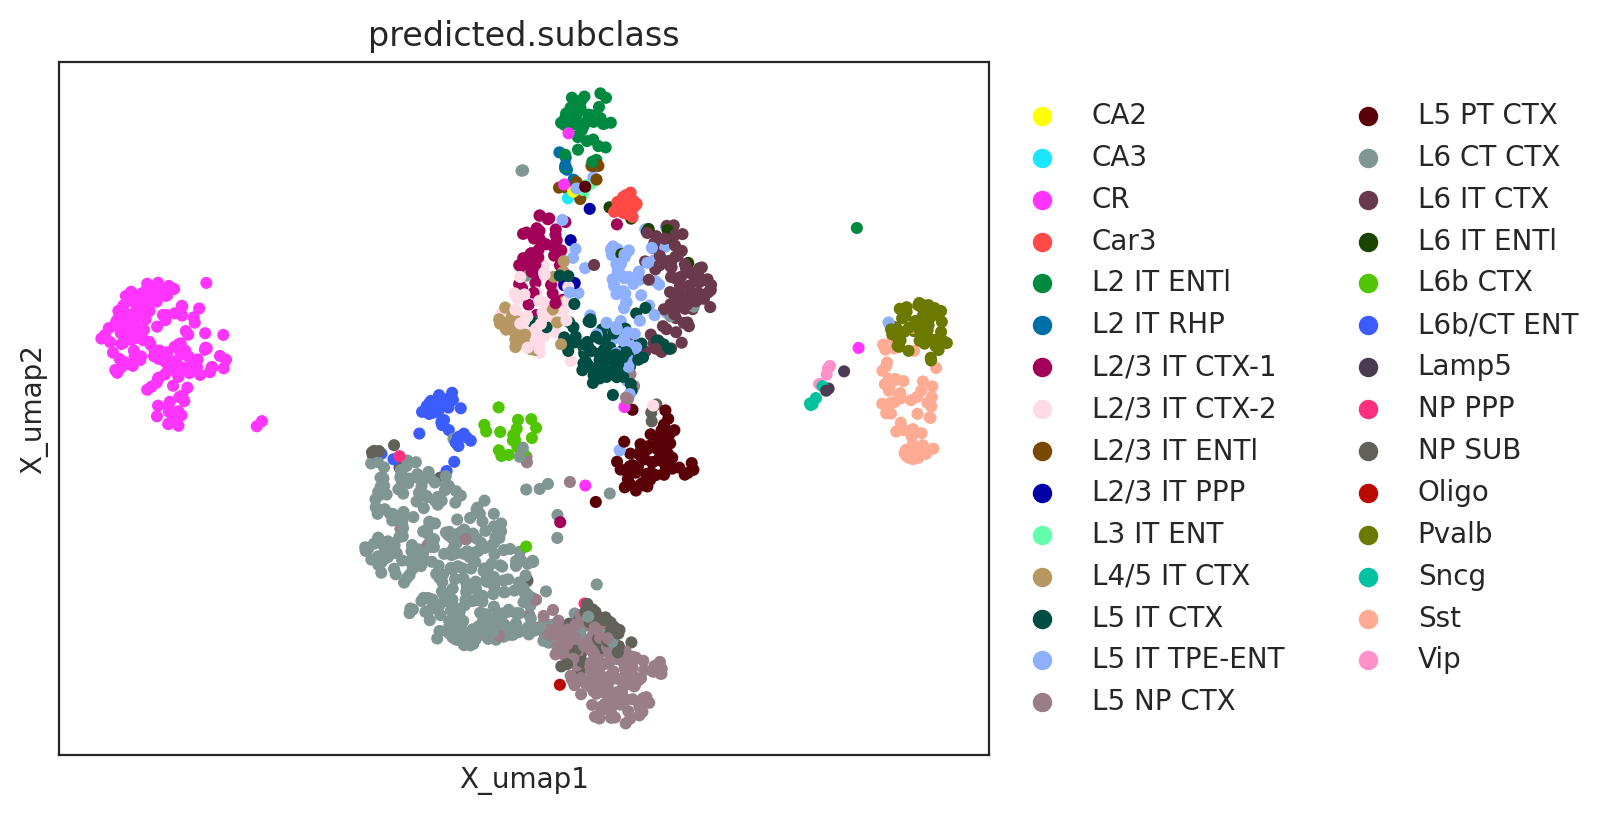

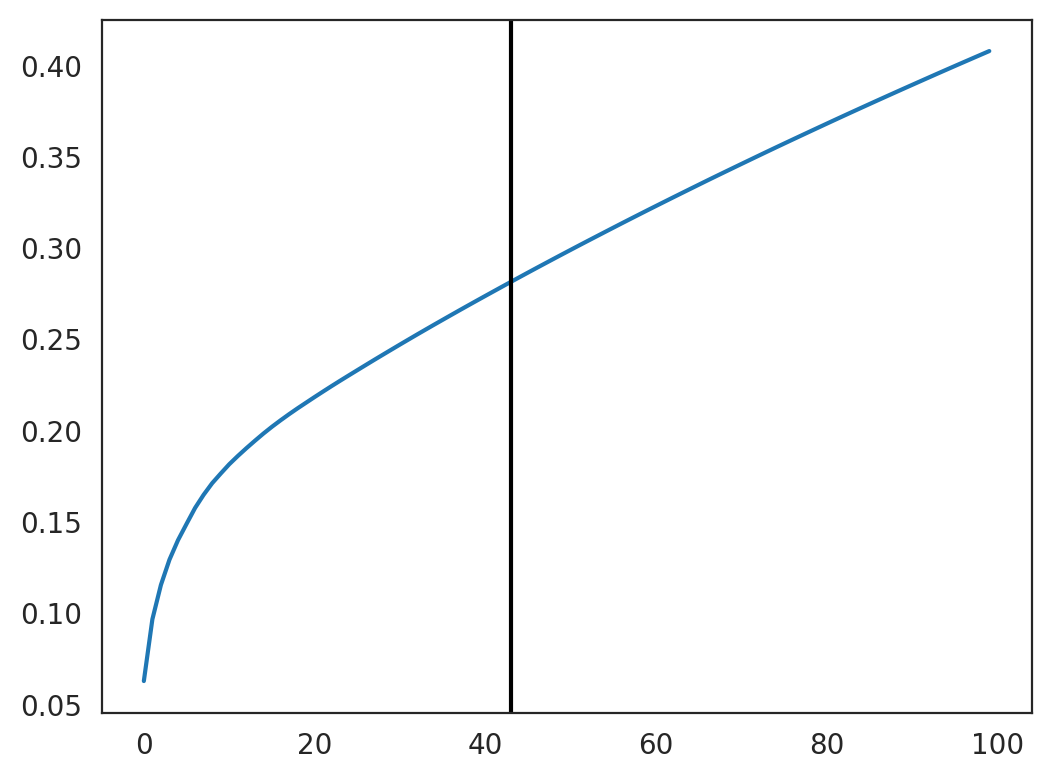

43
cell number is :1582
Auto-selected k is :39


In [34]:
tbr1 = ['Tbr1_1', 'Tbr1_2', 'Tbr1_3']
tbr1_adata = adata[adata.obs['assignDS'].isin(tbr1)].copy()
# Only consider genes with more than 1 count
sc.pp.filter_genes(tbr1_adata, min_counts=1)
# Normalize gene expression matrix with total UMI count per cell
sc.pp.normalize_per_cell(tbr1_adata, key_n_counts='nCount_RNA')
tbr1_adata = tbr1_adata[:, deg_list]
# Renormalize after filtering
sc.pp.normalize_per_cell(tbr1_adata)
tbr1_adata.raw = tbr1_adata
tbr1_adata.layers["raw_count"] = tbr1_adata.raw.X.copy()
# Log transformation and scaling
sc.pp.log1p(tbr1_adata)
sc.pp.scale(tbr1_adata)
print(f"Cell number is :{tbr1_adata.shape[0]}")
print(f"Gene number is :{tbr1_adata.shape[1]}")

# Load TF info which was made from mouse cell atlas dataset.
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()

# Check data
base_GRN.head()

# Instantiate Oracle object
tbr1_oracle = co.Oracle()

# In this notebook, we use the unscaled mRNA count for the input of Oracle object.
tbr1_adata.X = tbr1_adata.layers["raw_count"].copy()

# Instantiate Oracle object.
tbr1_oracle.import_anndata_as_raw_count(adata=tbr1_adata,
                                   cluster_column_name="predicted.subclass",
                                   embedding_name="X_umap")

# You can load TF info dataframe with the following code.
tbr1_oracle.import_TF_data(TF_info_matrix=base_GRN)

# Perform PCA
tbr1_oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(tbr1_oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

n_cell = tbr1_oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

tbr1_oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

# Save oracle object.
tbr1_oracle.to_hdf5("jinlab/ctxobj.tbr1.subclass.DEG.celloracle.oracle")

In [48]:
%%time
# Calculate GRN for each population in "louvain_annot" clustering unit.
# This step may take some time.(~30 minutes)
tbr1_links = tbr1_oracle.get_links(cluster_name_for_GRN_unit="predicted.subclass", alpha=10,
                         verbose_level=10)

tbr1_links.to_hdf5(file_path="jinlab/links.tbr1.subclass.DEG.celloracle.links")

  0%|          | 0/29 [00:00<?, ?it/s]

Inferring GRN for CA2...


  0%|          | 0/2368 [00:00<?, ?it/s]


Execution halted


Inferring GRN for CA3...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for CR...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Car3...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L2 IT ENTl...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L2 IT RHP...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L2/3 IT CTX-1...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L2/3 IT CTX-2...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L2/3 IT ENTl...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L2/3 IT PPP...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L3 IT ENT...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L4/5 IT CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L5 IT CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L5 IT TPE-ENT...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L5 NP CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L5 PT CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L6 CT CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L6 IT CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L6 IT ENTl...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L6b CTX...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for L6b/CT ENT...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Lamp5...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for NP PPP...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for NP SUB...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Oligo...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Pvalb...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Sncg...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Sst...


  0%|          | 0/2368 [00:00<?, ?it/s]

Inferring GRN for Vip...


  0%|          | 0/2368 [00:00<?, ?it/s]

CPU times: user 2h 47min 45s, sys: 1min 20s, total: 2h 49min 6s
Wall time: 2h 56min 10s


In [3]:
tbr1_links = co.load_hdf5("jinlab/links.tbr1.subclass.DEG.celloracle.links")
tbr1_oracle = co.load_hdf5("jinlab/ctxobj.tbr1.subclass.DEG.celloracle.oracle")

In [6]:
tbr1_links.filter_links()
tbr1_oracle.get_cluster_specific_TFdict_from_Links(links_object=tbr1_links)
tbr1_oracle.fit_GRN_for_simulation(alpha=10, 
                              GRN_unit="cluster",
                              use_cluster_specific_TFdict=True)

  0%|          | 0/29 [00:00<?, ?it/s]

In [7]:
goi = "Tbr1"

# Enter perturbation conditions to simulate signal propagation after the perturbation.
tbr1_oracle.simulate_shift(perturb_condition={goi: 0.0},
                      GRN_unit="cluster",
                      n_propagation=3)


In [8]:
oracle_input = tbr1_oracle.adata.copy()
oracle_count = tbr1_oracle.adata.copy()
oracle_input.X = tbr1_oracle.adata.layers["simulation_input"].copy()
oracle_count.X = tbr1_oracle.adata.layers["simulated_count"].copy()

In [9]:
# Assuming 'adata' is your AnnData object and clusters are identified
# 'cluster_key' is the key in adata.obs that contains cluster labels
# 'cluster_1' and 'cluster_2' are the cluster labels you want to compare

cluster_1_cells = oracle_count[oracle_count.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = oracle_input[oracle_input.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0)
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0)

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names
fold_change_df1 = pd.DataFrame({
    'Gene': genes,
    'Treatment_Fold_Change': fold_change,
    'Treatment_Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df1 = fold_change_df1.sort_values(by='Treatment_Fold_Change', ascending=False)

In [10]:
df = pd.read_csv('jinlab/edgeR_LRT_with_sva.Tbr1_1.Excit_L6CT_CTX.tsv', sep='\t')
df = df.sort_values(by='logFC', ascending=False)
df_sorted = df.iloc[df['logFC'].abs().argsort()]
rows_to_add = df_sorted.loc[df_sorted['Unnamed: 0'] == 'Tbr1']
DEG = df_sorted.tail(3000)
DEG = pd.concat([DEG, rows_to_add], ignore_index=True)
DEG.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)

In [20]:
result = pd.merge(fold_change_df1, DEG, on="Gene", how="inner")
result = result[result['Treatment_Log2_Fold_Change'] != 0]
result

,Gene,Treatment_Fold_Change,Treatment_Log2_Fold_Change,logFC,logCPM,LR,PValue,padj
0,Stxbp6,2.993243e+00,1.581710,2.087715,5.694808,3.343997,0.067451,0.473755
1,C1ql3,2.504266e+00,1.324388,-12.831547,3.267026,11.219583,0.000809,0.132396
2,Nxf1,1.421177e+00,0.507087,2.096236,6.114846,6.632021,0.010016,0.279754
3,Tmem167b,1.315695e+00,0.395825,-5.283549,5.491687,6.218094,0.012645,0.287181
4,Tecpr2,1.282899e+00,0.359407,2.108800,5.352736,1.558672,0.211860,0.659910
...,...,...,...,...,...,...,...,...
2996,Nxt2,4.320627e-01,-1.210688,-4.476127,3.741671,2.023397,0.154892,0.605027
2997,Dvl2,4.225169e-01,-1.242919,-2.243148,4.826062,1.220200,0.269321,0.710587
2998,Acp6,2.831758e-01,-1.820230,-3.214811,4.261883,1.035567,0.308855,0.733798
2999,Rab26,2.472753e-01,-2.015810,-3.143196,4.537746,0.972873,0.323965,0.744795


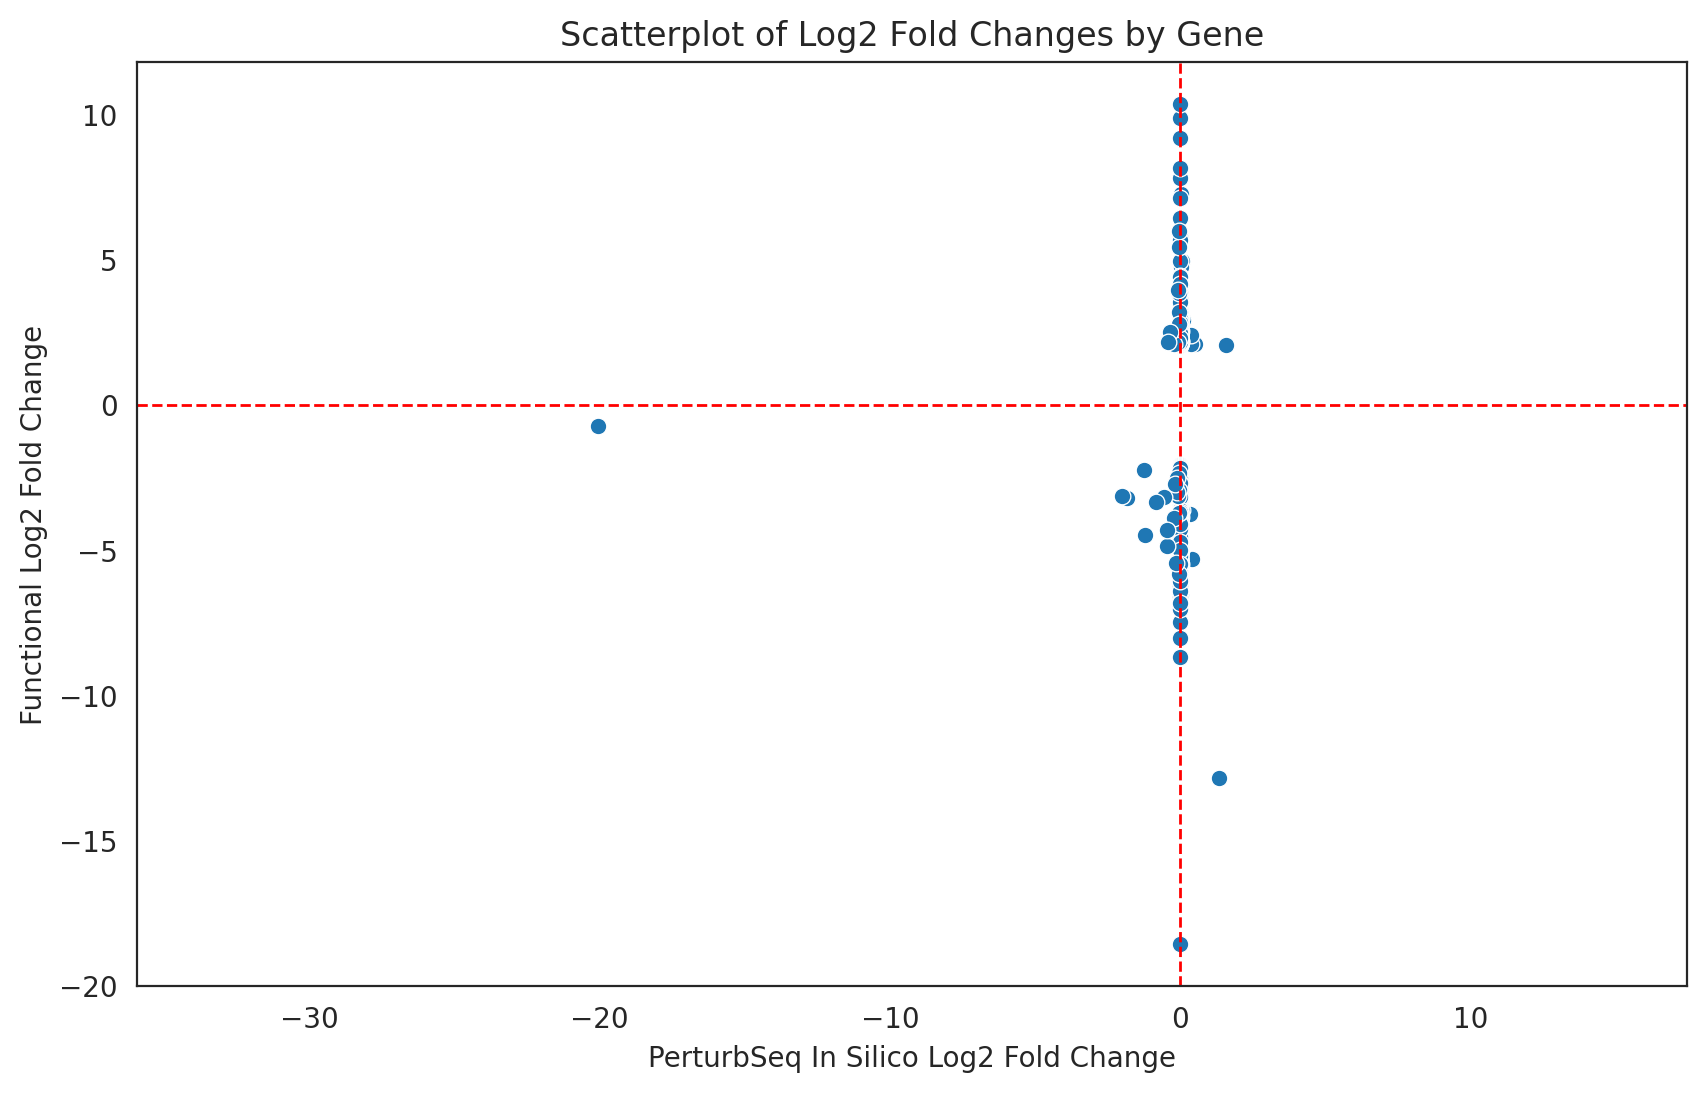

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='Treatment_Log2_Fold_Change', y='logFC')

# Add labels and title
plt.xlabel('PerturbSeq In Silico Log2 Fold Change')
plt.ylabel('Functional Log2 Fold Change')
plt.xticks()
plt.yticks()
plt.title('Scatterplot of Log2 Fold Changes by Gene')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axis('equal')


# Display the plot
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Example arrays (logFC for in silico and functional perturbations)
# Positive logFC classified as 1, negative as 0
in_silico_fc = result['Treatment_Log2_Fold_Change']  # LogFC from in silico perturbations
functional_fc = result['logFC']  # LogFC from functional perturbations

# Convert logFC to binary classifications (1 = positive, 0 = negative)
in_silico_class = [1 if fc > 0 else 0 for fc in in_silico_fc]
functional_class = [1 if fc > 0 else 0 for fc in functional_fc]

# Create confusion matrix
tn, fp, fn, tp = confusion_matrix(functional_class, in_silico_class).ravel()
print(f"Confusion Matrix: TP = {tp}, FP = {fp}, TN = {tn}, FN = {fn}")

# Approximate AUROC score
# If we had continuous values for in silico predictions, we could use roc_auc_score directly
# For binary classification, we calculate AUROC based on the classes:
auc_score = roc_auc_score(functional_class, in_silico_class)
print(f"AUC: {auc_score}")

Confusion Matrix: TP = 56, FP = 115, TN = 110, FN = 72
AUC: 0.46319444444444446


AUC: 0.46594049225628176


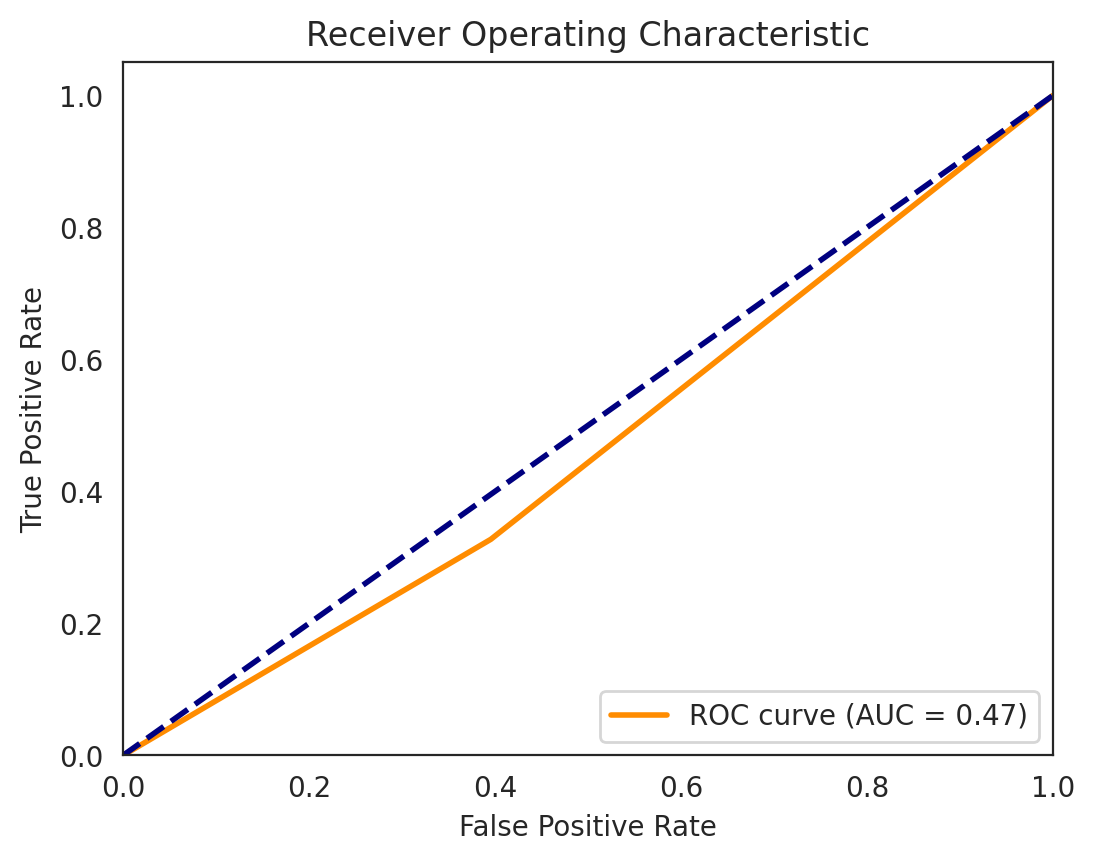

In [16]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming:
# - true_labels: A binary array from the functional perturbation matrix (1 for significant perturbation, 0 for non-significant)
# - predicted_scores: A continuous array from the in silico perturbation matrix (predicted values)

# Example arrays
# true_labels = [0, 1, 1, 0, 1, 0, 1, 1]  # Binary true labels
# predicted_scores = [0.1, 0.4, 0.35, 0.8, 0.7, 0.2, 0.9, 0.85]  # Continuous predicted scores

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(in_silico_class, functional_class)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
mock_oracle = oracle.adata.copy()
mock_ctrl = ctrl_oracle.adata.copy()
filtered_oracle = mock_oracle[mock_ctrl.obs_names].copy()

In [23]:
peturb = oracle.adata.copy()

control = ['NonTarget1', 'NonTarget2', 'SafeTarget', 'GFP']
peturb_ctrl = peturb[peturb.obs['assignDS'].isin(control)].copy()

treatment = ['Tbr1_1', 'Tbr1_2', 'Tbr1_3']
peturb_tm = peturb[peturb.obs['assignDS'].isin(treatment)].copy()

foxg1 = ['Foxg1_1', 'Foxg1_2', 'Foxg1_3']
peturb_foxg1 = peturb[peturb.obs['assignDS'].isin(foxg1)].copy()

column_labels = oracle.adata.var_names.tolist()

peturb_ctrl = peturb_ctrl[:, peturb_ctrl.var_names.isin(column_labels)]
peturb_tm = peturb_tm[:, peturb_tm.var_names.isin(column_labels)]

cluster_1_cells = peturb_tm[peturb_tm.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = peturb_ctrl[peturb_ctrl.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0).A1
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0).A1

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names

fold_change_df3 = pd.DataFrame({
    'Gene': genes,
    'Fold_Change': fold_change,
    'Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df3 = fold_change_df3.sort_values(by='Fold_Change', ascending=False)

In [24]:
fold_change_df3

,Gene,Fold_Change,Log2_Fold_Change
2913,Gm6602,10.929303,3.450130
2486,Bmp2,9.771851,3.288632
2459,Gpc4,5.456245,2.447908
1443,Slc1a3,5.273036,2.398634
12,Stxbp6,5.125120,2.357586
...,...,...,...
2530,Ankrd63,0.278866,-1.842358
2769,Gm48295,0.264492,-1.918702
2844,Ucma,0.210760,-2.246324
1837,Ptpn13,0.204884,-2.287117


# Test Variable Genes

In [3]:
oracle = co.load_hdf5("jinlab/ctxobj.subclass.calculated.celloracle.oracle")
ctrl_oracle = co.load_hdf5("jinlab/ctxobj.ctrl.subclass.calculated.celloracle.oracle")

In [5]:
goi = "Tbr1"

# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.46},
                      GRN_unit="cluster",
                      n_propagation=3)

oracle_input = oracle.adata.copy()
oracle_count = oracle.adata.copy()
oracle_input.X = oracle.adata.layers["simulation_input"].copy()
oracle_count.X = oracle.adata.layers["simulated_count"].copy()

cluster_1_cells = oracle_count[oracle_count.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = oracle_input[oracle_input.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0)
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0)

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names
fold_change_df1 = pd.DataFrame({
    'Gene': genes,
    'Control_Fold_Change': fold_change,
    'Control_Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df1 = fold_change_df1.sort_values(by='Control_Fold_Change', ascending=False)

peturb = oracle.adata.copy()

control = ['NonTarget1', 'NonTarget2', 'SafeTarget', 'GFP']
peturb_ctrl = peturb[peturb.obs['assignDS'].isin(control)].copy()

treatment = ['Tbr1_1', 'Tbr1_2', 'Tbr1_3']
peturb_tm = peturb[peturb.obs['assignDS'].isin(treatment)].copy()

foxg1 = ['Foxg1_1', 'Foxg1_2', 'Foxg1_3']
peturb_foxg1 = peturb[peturb.obs['assignDS'].isin(foxg1)].copy()

column_labels = oracle.adata.var_names.tolist()
peturb_ctrl = peturb_ctrl[:, peturb_ctrl.var_names.isin(column_labels)]
peturb_tm = peturb_tm[:, peturb_tm.var_names.isin(column_labels)]

# Assuming 'adata' is your AnnData object and clusters are identified
# 'cluster_key' is the key in adata.obs that contains cluster labels
# 'cluster_1' and 'cluster_2' are the cluster labels you want to compare

cluster_1_cells = peturb_foxg1[peturb_foxg1.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = peturb_ctrl[peturb_ctrl.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0).A1
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0).A1

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names

fold_change_df3 = pd.DataFrame({
    'Gene': genes,
    'Fold_Change': fold_change,
    'Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df3 = fold_change_df3.sort_values(by='Fold_Change', ascending=False)


In [6]:
combin

,Gene,Control_Fold_Change,Control_Log2_Fold_Change
145,C1ql3,5.766358,2.527660
1971,Il1rapl2,2.064827,1.046021
728,Plxnd1,2.034321,1.024547
1962,Slc16a2,2.033333,1.023846
1661,Cpne8,1.381432,0.466164
...,...,...,...
1577,Pcdh20,0.744415,-0.425820
624,Cux1,0.648667,-0.624450
341,Fstl5,0.611965,-0.708480
1417,Traf3,0.514493,-0.958777


In [7]:
fold_change_df3

,Gene,Fold_Change,Log2_Fold_Change
1447,Pxdc1,11324.334961,13.467138
1517,Fst,10469.778320,13.353943
403,Gm10636,6051.575195,12.563095
1641,Mfng,5698.806641,12.476444
1846,1700001G01Rik,4449.524414,12.119435
...,...,...,...
437,Abca1,0.000205,-12.250648
1311,Top2a,0.000198,-12.301984
1467,Syk,0.000198,-12.302293
635,Elfn1,0.000180,-12.436070


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='Control_Log2_Fold_Change', y='logFC')

"""
for i in range(1, len(result)):
    x_val = result['Control_Log2_Fold_Change'][i]
    y_val = result['logFC'][i]
    if abs(x_val) > 1 or abs(y_val) > 1:
        plt.text(
            x_val, 
            y_val, 
            result['Gene'][i],
            fontsize=9,
            ha='right'  # horizontal alignment
        )
"""

# Add labels and title
plt.xlabel('In Silico Log2 Fold Change')
plt.ylabel('Functional Log2 Fold Change')
plt.xticks()
plt.yticks()
plt.title('Scatterplot of Log2 Fold Changes by Gene')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axis('equal')


# Display the plot
plt.show()

In [ ]:
oracle_input = oracle.adata.copy()
oracle_count = oracle.adata.copy()
oracle_input.X = oracle.adata.layers["simulation_input"].copy()
oracle_count.X = oracle.adata.layers["simulated_count"].copy()

cluster_1_cells = oracle_count[oracle_count.obs['predicted.subclass'] == 'L6 CT CTX']
cluster_2_cells = oracle_input[oracle_input.obs['predicted.subclass'] == 'L6 CT CTX']

# Calculate mean expression for each gene in both clusters
mean_expression_cluster_1 = cluster_1_cells.X.mean(axis=0)
mean_expression_cluster_2 = cluster_2_cells.X.mean(axis=0)

pseudocount = 1e-6 
fold_change = (mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount)
log_fold_change = np.log2((mean_expression_cluster_1 + pseudocount) / (mean_expression_cluster_2 + pseudocount))

# Convert to a DataFrame for easy viewing
genes = cluster_1_cells.var_names
fold_change_df1 = pd.DataFrame({
    'Gene': genes,
    'Control_Fold_Change': fold_change,
    'Control_Log2_Fold_Change': log_fold_change
})

# Sort by fold change or log fold change
fold_change_df1 = fold_change_df1.sort_values(by='Control_Fold_Change', ascending=False)

df = pd.read_csv('jinlab/edgeR_LRT_with_sva.Tbr1_1.Excit_L6CT_CTX.tsv', sep='\t')
df = df.sort_values(by='logFC', ascending=False)
df_sorted = df.iloc[df['logFC'].abs().argsort()]
rows_to_add = df_sorted.loc[df_sorted['Unnamed: 0'] == 'Tbr1']
DEG = df_sorted.tail(3000)
DEG = pd.concat([DEG, rows_to_add], ignore_index=True)